<a href="https://colab.research.google.com/github/syarbinilucky/data-analyst/blob/main/clustering_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files
uploaded = files.upload()

Saving data_capital.csv to data_capital.csv


In [ ]:
# Membaca file CSV yang diunggah
data = pd.read_csv('data_capital.csv')

# Memilih kolom yang dibutuhkan
data_cluster = data[['cash_financial_inflow', 'credit_score']]

# Menginisialisasi KMeans dengan 5 cluster
kmeans = KMeans(n_clusters=5, random_state=42)

# Melakukan fitting dan prediksi
data_cluster['cluster'] = kmeans.fit_predict(data_cluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-7-2db0e60f4e11>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.fit_predict(data_cluster)


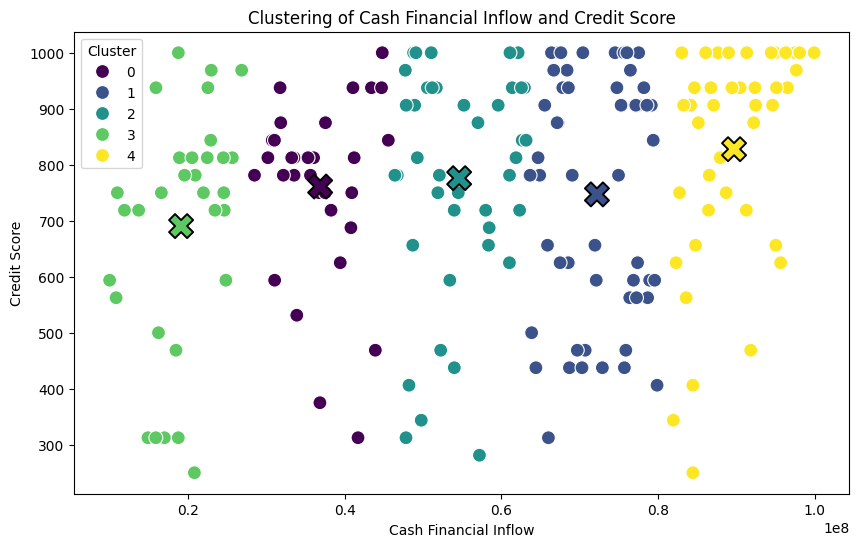

In [ ]:
# Menambahkan centroid ke dalam dataframe
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['cash_financial_inflow', 'credit_score'])
centroid_df['cluster'] = range(5)

# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cluster, x='cash_financial_inflow', y='credit_score', hue='cluster', palette='viridis', s=100)
sns.scatterplot(data=centroid_df, x='cash_financial_inflow', y='credit_score', hue='cluster', palette='viridis', s=300, marker='X', edgecolor='black', legend=False)
plt.title('Clustering of Cash Financial Inflow and Credit Score')
plt.xlabel('Cash Financial Inflow')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()

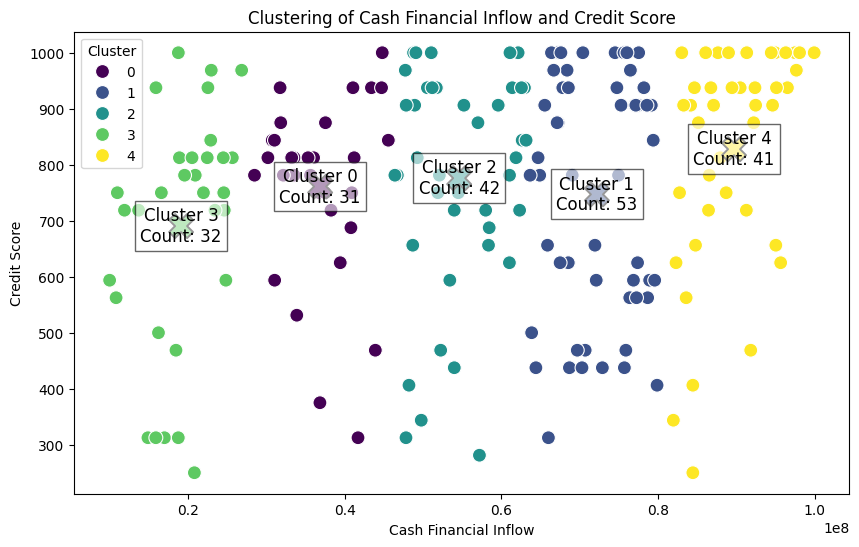

In [ ]:
# Menghitung jumlah anggota di setiap cluster
cluster_counts = data_cluster['cluster'].value_counts().sort_index()
# Visualisasi cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cluster, x='cash_financial_inflow', y='credit_score', hue='cluster', palette='viridis', s=100)
sns.scatterplot(data=centroid_df, x='cash_financial_inflow', y='credit_score', hue='cluster', palette='viridis', s=300, marker='X', edgecolor='black', legend=False)

# Menambahkan informasi jumlah anggota di setiap cluster
for cluster, count in cluster_counts.items():
    plt.text(centroid_df.loc[centroid_df['cluster'] == cluster, 'cash_financial_inflow'].values[0],
             centroid_df.loc[centroid_df['cluster'] == cluster, 'credit_score'].values[0],
             f'Cluster {cluster}\nCount: {count}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black'))

plt.title('Clustering of Cash Financial Inflow and Credit Score')
plt.xlabel('Cash Financial Inflow')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()


In [ ]:
data_capital = pd.read_csv('data_capital.csv')

# Display the first few rows of the data
print(data_capital.head())

                     nama      cash                      cash_type  \
0             Gary Garcia  44760000                   >=25.000.000   
1  Mrs. Barbara Jones DVM  14569000   >= 5.000.000 dan <15.000.000   
2            Amanda Grant  33025000                   >=25.000.000   
3            Jamie Pierce  22031000  >=15.000.000 dan < 25.000.000   
4            Connie Moore  29169000                   >=25.000.000   

   cash_score_1  cash_score  property_plant_equipment  \
0          1000        1.00                  84012000   
1           500        0.50                  41274000   
2          1000        1.00                  61118000   
3           750        0.75                  14080000   
4          1000        1.00                  64688000   

            sumber_asset_lainnya  asset_lainnya           asset_lainnya_type  \
0                      inventory      178403000  >=100000000 dan < 200000000   
1  property. plant and equipment      389542000                  >=200000000

Missing values percentage in each column:
 nama                             0.0
cash                             0.0
cash_type                        0.0
cash_score_1                     0.0
cash_score                       0.0
property_plant_equipment         0.0
sumber_asset_lainnya             0.0
asset_lainnya                    0.0
asset_lainnya_type               0.0
asset_lainnya_score_2            0.0
asset_lainnya_score              0.0
sumber_asset_keluarga            0.0
asset_keluarga                   0.0
asset_keluarga_type              0.0
asset_keluarga_score_3           0.0
asset_keluarga_score             0.0
total_asset                      0.0
total_asset_type                 0.0
total_asset_score_4              0.0
total_asset_score                0.0
total_hutang                     0.0
modal                            0.0
debt_to_asset_ratio              0.0
debt_to_asset_ratio_cat          0.0
debt_to_asset_ratio_score_5      0.0
debt_to_asset_ratio_score       

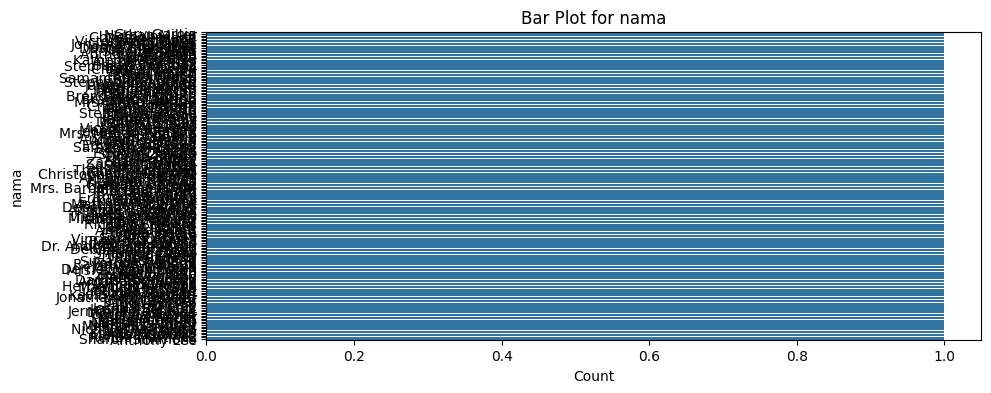

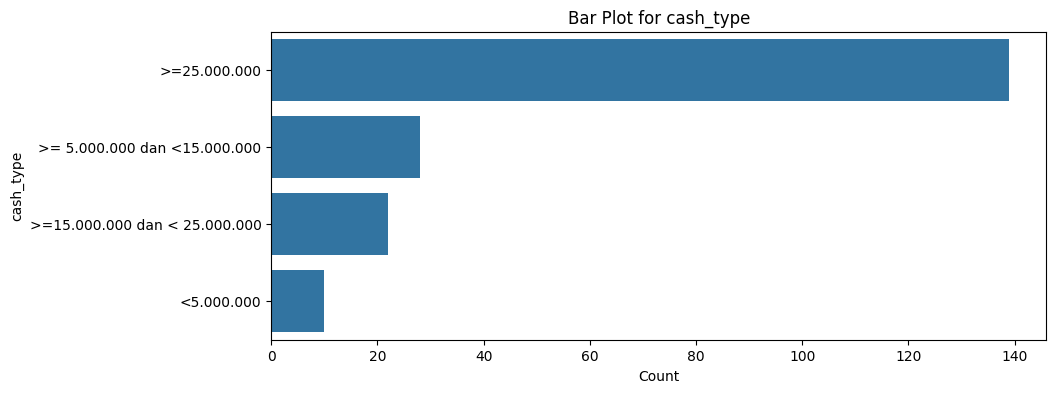

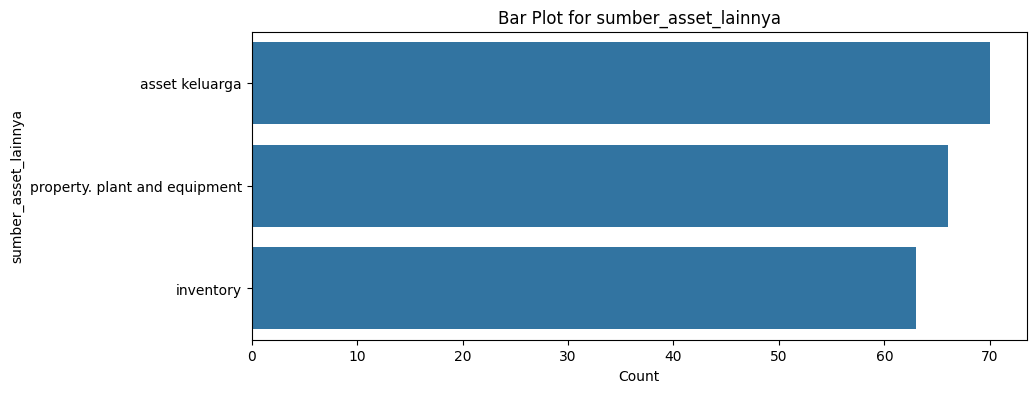

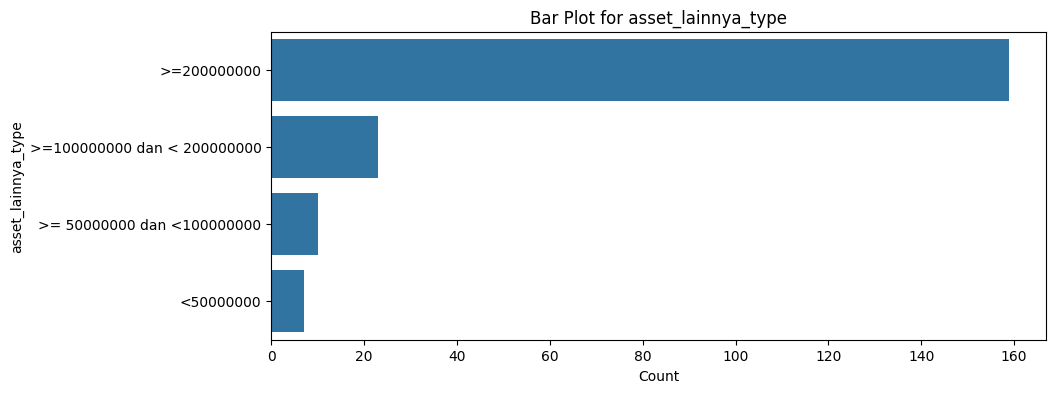

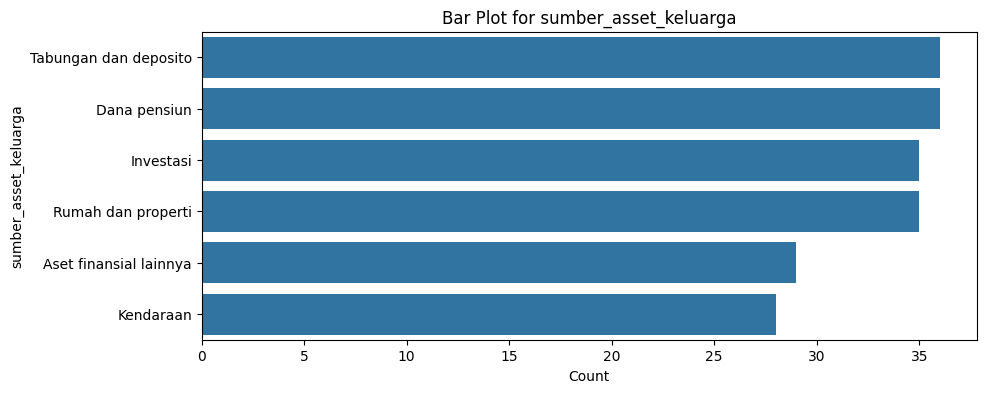

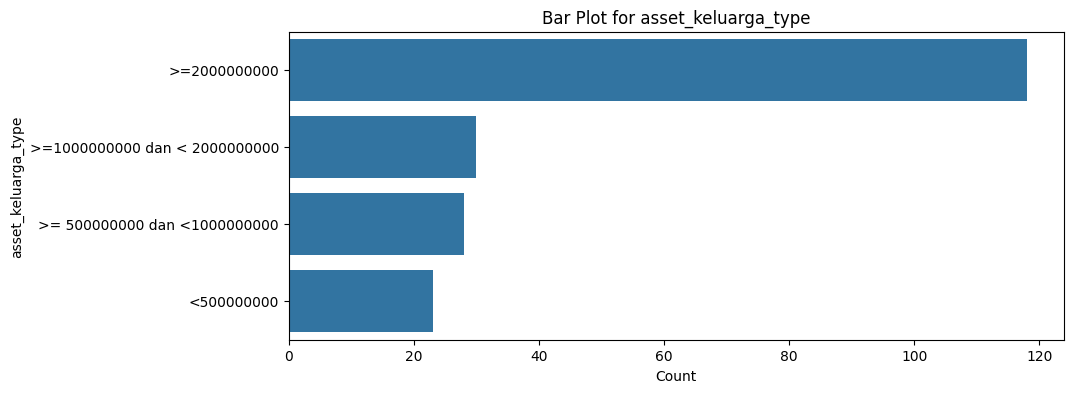

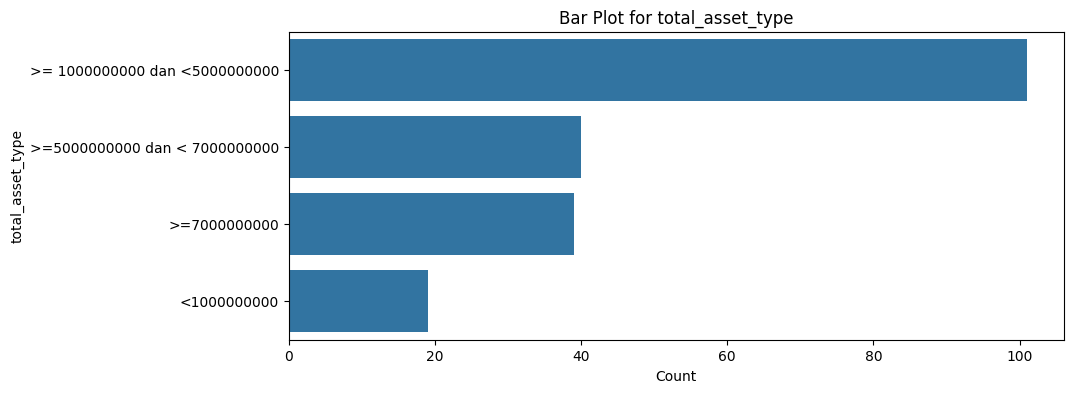

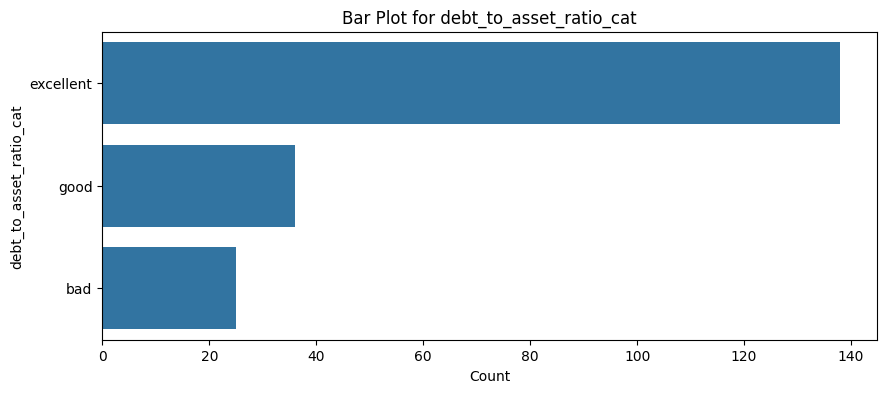

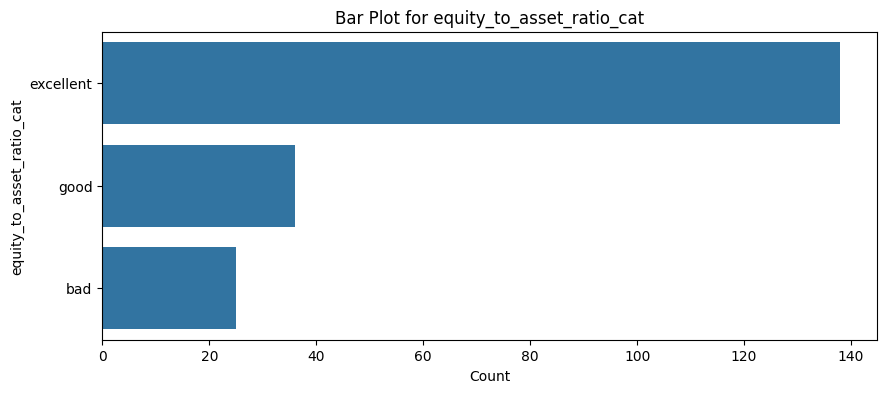

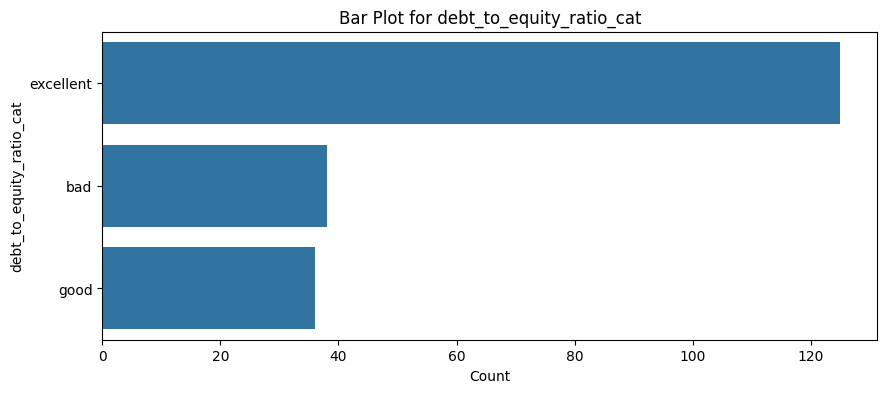

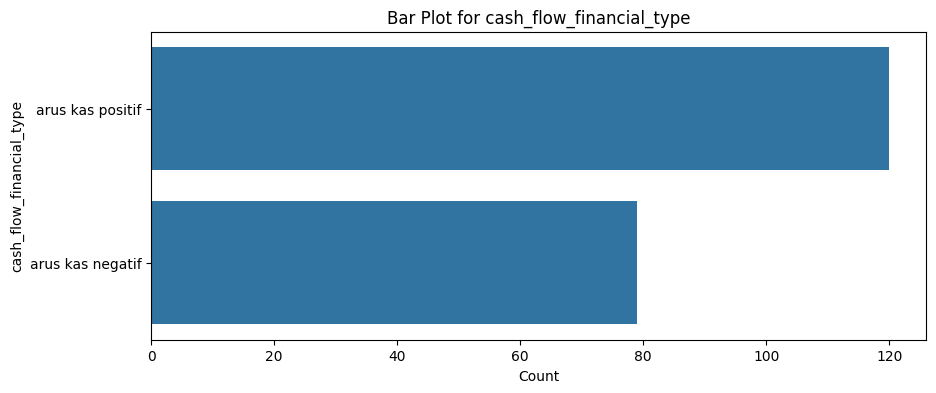

In [ ]:
#melihat persentase missing values:
missing_percentage = (data_capital.isnull().sum() / len(data_capital)) * 100
print("Missing values percentage in each column:\n", missing_percentage)
# Bar Plot for categorical columns
categorical_cols = data_capital.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=data_capital, order=data_capital[col].value_counts().index)
    plt.title(f'Bar Plot for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
